## Динамическое программирование

Сколькими способами робот может попасть из левого верхнего угла в правый нижний?

![robot_maze[1].png](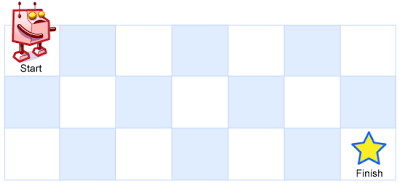)

In [ ]:
n, m = 3, 7
a = [[0] * (m + 1) for _ in range(n + 1)]
a[1][1] = 1
for i in range(1, n + 1):
  for j in range(1, m + 1):
    a[i][j] += a[i - 1][j] + a[i][j - 1]
for line in a:
  print(*line)

0 0 0 0 0 0 0 0
0 1 1 1 1 1 1 1
0 1 2 3 4 5 6 7
0 1 3 6 10 15 21 28


А если добавить препятствия?

![robot1[1].jpg](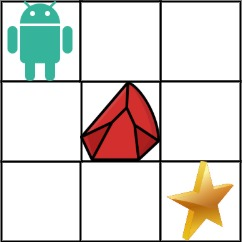)

In [ ]:
n, m = 3, 7
a = [[0] * (m + 1) for _ in range(n + 1)]
a[2][2], a[3][5], a[2][6] = 1, 1, 1
for i in range(n + 1):
  for j in range(m + 1):
    a[i][j] *= -1
a[1][1] = 1
for i in range(1, n + 1):
  for j in range(1, m + 1):
    if a[i][j] >= 0:
      if a[i - 1][j] >= 0:
        a[i][j] += a[i - 1][j]
      if a[i][j - 1] >= 0:
        a[i][j] += a[i][j - 1]
for line in a:
  print(*line)

0 0 0 0 0 0 0 0
0 1 1 1 1 1 1 1
0 1 -1 1 2 3 -1 1
0 1 1 2 4 -1 0 1


**Задача**: перед нами лестница из $n$ ступеней. Мы можем прыгать либо на следующую ступеньку, либо через ступеньку. Сколькими способами мы можем добраться до последней ступеньки?

In [ ]:
n = 30
b = [0] * (n + 1)
b[1] = 1
for i in range(2, n + 1):
  b[i] = b[i - 1] + b[i - 2]
print(*b)

0 1 1 2 3 5 8 13 21 34 55 89 144 233 377 610 987 1597 2584 4181 6765 10946 17711 28657 46368 75025 121393 196418 317811 514229 832040


**Задача**: Вы - профессиональный грабитель, который планирует череду ограблений на улице. В каждом доме находится определенное количество денег и единственное, что останавливает вас от ограбления всех домов за ночь - система безопасности, которая соединяет стоящие рядом дома. Это значит, что если вы решите ограбить за одну ночь два стоящих рядом дома, то сработает сигнализация и приедет полиция.

Ваша задача - по массиву целых чисел определить какую максимальную сумму за одну ночь вы можете вынести и не попасться полиции

In [ ]:
c = [1, 2, 3, 4, 5, 6]
prev_prev_prev, prev_prev, prev = 0, 0, 0
for curr in c:
  prev_prev_prev, prev_prev, prev = prev_prev, prev, max(curr + prev_prev_prev, curr + prev_prev)
print(max(prev, prev_prev))
print(prev_prev_prev, prev_prev, prev)

12
6 9 12


### Задача о рюкзаке

Задача о рюкзаке (англ. Knapsack problem) — дано $N$ предметов, $n_i$ предмет имеет массу $w_i>0$ и стоимость $p_i>0$. Необходимо выбрать из этих предметов такой набор, чтобы суммарная масса не превосходила заданной величины $W$ (вместимость рюкзака), а суммарная стоимость была максимальна.

In [ ]:
W = 4
N = 4
items = [[1, 3],
         [4, 11],
         [2, 4],
         [1, 5]]
A = [[0] * (W + 1) for _ in range(N + 1)]
for i in range(1, N + 1):
  for j in range(1, W + 1):
    if j >= items[i - 1][0]:
      A[i][j] = max(A[i - 1][j], A[i - 1][j - items[i - 1][0]] + items[i - 1][1])
for line in A:
  print(*line)

0 0 0 0 0
0 3 3 3 3
0 0 0 0 11
0 0 4 4 11
0 5 5 9 11


### Расстояние Левенштейна

In [ ]:
def chr_diff(chr1: str, chr2: str):
  return (int(chr1 == chr2) + 1) % 2

s = 'лабрадор'
t = 'гибралтар'
n, m = len(s), len(t)
D = [[0] * (m + 1) for _ in range(n + 1)]
for i in range(1, n + 1):
  D[i][0] = i
for j in range(1, m + 1):
  D[0][j] = j
for i in range(1, n + 1):
  for j in range(1, m + 1):
    D[i][j] = min(D[i - 1][j] + 1, D[i][j - 1] + 1, D[i - 1][j - 1] + chr_diff(s[i - 1], t[j - 1]))
for line in D:
  print(*line)

0 1 2 3 4 5 6 7 8 9
1 1 2 3 4 5 5 6 7 8
2 2 2 3 4 4 5 6 6 7
3 3 3 2 3 4 5 6 7 7
4 4 4 3 2 3 4 5 6 7
5 5 5 4 3 2 3 4 5 6
6 6 6 5 4 3 3 4 5 6
7 7 7 6 5 4 4 4 5 6
8 8 8 7 6 5 5 5 5 5
